In [2]:
import pandas as pd

df = pd.read_csv("/home/bipin/Documents/NLP-TUTORIAL/dataset/df_file.csv")  # replace with your actual path
print(df.head())
print(df['Label'].value_counts())  # Check class distribution


                                                Text  Label
0  Budget to set scene for election\n \n Gordon B...      0
1  Army chiefs in regiments decision\n \n Militar...      0
2  Howard denies split over ID cards\n \n Michael...      0
3  Observers to monitor UK election\n \n Minister...      0
4  Kilroy names election seat target\n \n Ex-chat...      0
Label
1    511
4    510
0    417
2    401
3    386
Name: count, dtype: int64


In [3]:
def clean_text(text):
    import string
    text = text.lower()
    for ch in string.punctuation:
        text = text.replace(ch, '')
    return text

df['clean_text'] = df['Text'].apply(clean_text)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y = le.fit_transform(df['Label'])  # e.g., 'sport' → 4

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [8]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.9820224719101124


In [9]:
target_names = [str(label) for label in le.classes_]
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))



Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        84
           1       1.00      1.00      1.00       102
           2       0.96      0.99      0.98        80
           3       0.99      0.95      0.97        77
           4       0.99      0.97      0.98       102

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445



In [10]:
new_text = "The team won the Premier League after a stunning season"
cleaned = clean_text(new_text)
X_new = vectorizer.transform([cleaned])
pred = model.predict(X_new)[0]
print("Predicted Category:", le.inverse_transform([pred])[0])

Predicted Category: 1


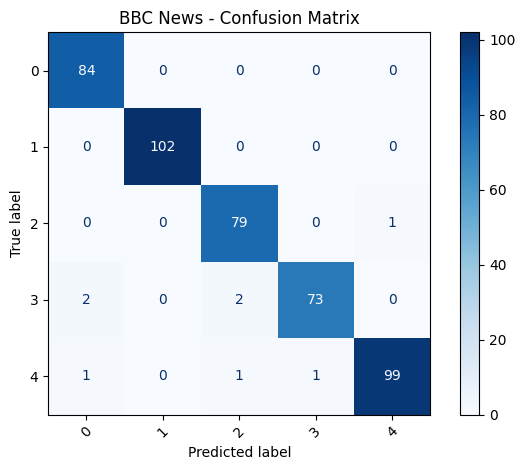

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create label names (convert to string if needed)
target_names = [str(label) for label in le.classes_]

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("BBC News - Confusion Matrix")
plt.tight_layout()
plt.show()
